In [7]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_market_info.head()

plt.rcParams['figure.figsize'] = (20, 6)

In [8]:
# get market info for ethereum from the start of 2016 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-09-27,215.44,230.61,212.65,228.49,2030320000,22019534943
1,2018-09-26,218.65,221.44,209.11,215.85,1756100000,22342857545
2,2018-09-25,228.33,228.33,206.49,218.50,2120360000,23327387770
3,2018-09-24,244.84,245.11,227.49,228.73,1748740000,25009868628
4,2018-09-23,240.99,247.46,237.86,244.33,1693470000,24611501926


In [9]:
# get market info for ethereum from the start of 2016 to the current day
ltc_market_info = pd.read_html("https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ltc_market_info = ltc_market_info.assign(Date=pd.to_datetime(ltc_market_info['Date']))

ltc_market_info.loc[ltc_market_info['Volume']=="-",'Volume']=0
# convert to int
ltc_market_info['Volume'] = ltc_market_info['Volume'].astype('int64')

# look at the first few rows
ltc_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-09-27,57.45,64.30,56.92,62.98,574277000,3358935258
1,2018-09-26,57.45,59.62,56.70,57.40,294136000,3358146782
2,2018-09-25,58.02,58.15,54.74,57.54,351579000,3390746706
3,2018-09-24,61.34,61.34,57.30,57.97,296366000,3583790265
4,2018-09-23,60.55,63.19,60.00,61.37,304888000,3536650635


To explain what's just happened, we've loaded some python packages and then imported the table that you see on [this site](https://coinmarketcap.com/currencies/bitcoin/historical-data/). With a little bit of data cleaning, we arrive at the above table. We also do the same thing for ether by simply replacing 'bitcoin' with 'ethereum' in the url (code omitted).

To prove that the data is accurate, we can plot the price and volume of both cryptos over time.

In [10]:
# getting the Bitcoin and Eth logos
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [11]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]
ltc_market_info.columns =[ltc_market_info.columns[0]]+['ltc_'+i for i in ltc_market_info.columns[1:]]

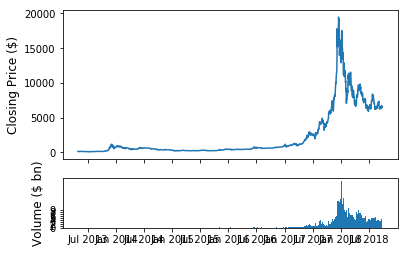

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open*'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
plt.show()

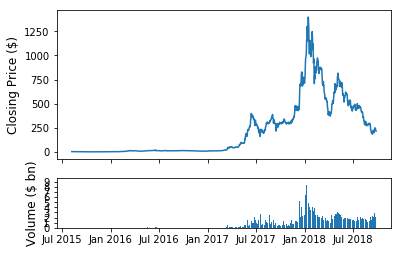

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open*'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
plt.show()

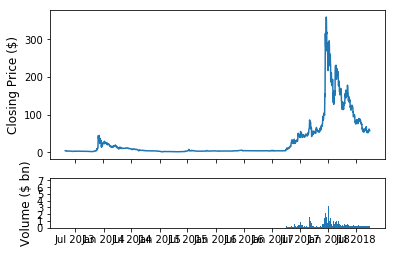

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(ltc_market_info['Date'].astype(datetime.datetime),ltc_market_info['ltc_Open*'])
ax2.bar(ltc_market_info['Date'].astype(datetime.datetime).values, ltc_market_info['ltc_Volume'].values)
plt.show()

In [20]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = pd.merge(market_info,ltc_market_info, on=['Date']) 
market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'eth_', 'ltc_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close**']-x[coins+'Open*'])/x[coins+'Open*']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap,eth_Open*,eth_High,eth_Low,...,eth_Market Cap,ltc_Open*,ltc_High,ltc_Low,ltc_Close**,ltc_Volume,ltc_Market Cap,bt_day_diff,eth_day_diff,ltc_day_diff
0,2018-09-27,6495.29,6712.10,6464.95,6676.75,4606810000,112305283440,215.44,230.61,212.65,...,22019534943,57.45,64.30,56.92,62.98,574277000,3358935258,0.027937,0.060574,0.096258
1,2018-09-26,6452.79,6585.91,6397.89,6495.00,4437300000,111559240252,218.65,221.44,209.11,...,22342857545,57.45,59.62,56.70,57.40,294136000,3358146782,0.006541,-0.012806,-0.000870
2,2018-09-25,6603.64,6603.64,6381.86,6446.47,4726180000,114153287747,228.33,228.33,206.49,...,23327387770,58.02,58.15,54.74,57.54,351579000,3390746706,-0.023801,-0.043052,-0.008273
3,2018-09-24,6704.77,6713.56,6580.90,6595.41,4177310000,115889159338,244.84,245.11,227.49,...,25009868628,61.34,61.34,57.30,57.97,296366000,3583790265,-0.016311,-0.065798,-0.054940
4,2018-09-23,6715.32,6766.15,6679.42,6710.63,4197500000,116058736872,240.99,247.46,237.86,...,24611501926,60.55,63.19,60.00,61.37,304888000,3536650635,-0.000698,0.013859,0.013543


### Training, Test & Random Walks

We have some data, so now we need to build a model. In deep learning, the data is typically split into training and test sets. The model is built on the training set and subsequently evaluated on the unseen test set. In time series models, we generally train on one period of time and then test on another separate period. Rather arbitrarily, I'll set the cut-off date to June 1st 2017 (i.e. model will be trained on data before that date and assessed on data after it).

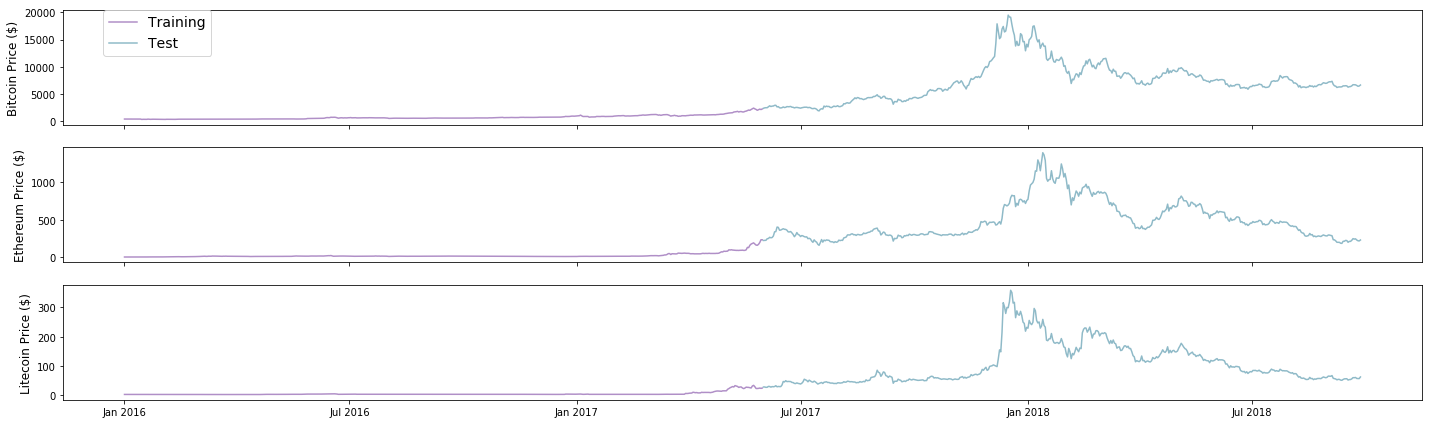

In [21]:
split_date = '2017-06-01'
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels('')
ax3.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax3.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close**'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close**'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close**'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close**'], color='#8FBAC8')
ax3.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['ltc_Close**'], 
         color='#B08FC7')
ax3.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['ltc_Close**'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax3.set_ylabel('Litecoin Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

You can see that the training period mostly consists of periods when cryptos were relatively cheaper. As such, the training data may not be representative of the test data, undermining the model's ability to generalise to unseen data (you could try to make your data stationary- discussed [here](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/)). But why let negative realities get in the way of baseless optimism? Before we take our deep artificially intelligent machine learning model to the moon, it's worth discussing a simpler model. The most basic model is to set tomorrow's price equal to today's price (which we'll crudely call a lag model). This is how we'd define such a model in mathematical terms:

\begin{align}
PredPrice_{t} & = ActualPrice_{t-1}
\end{align}

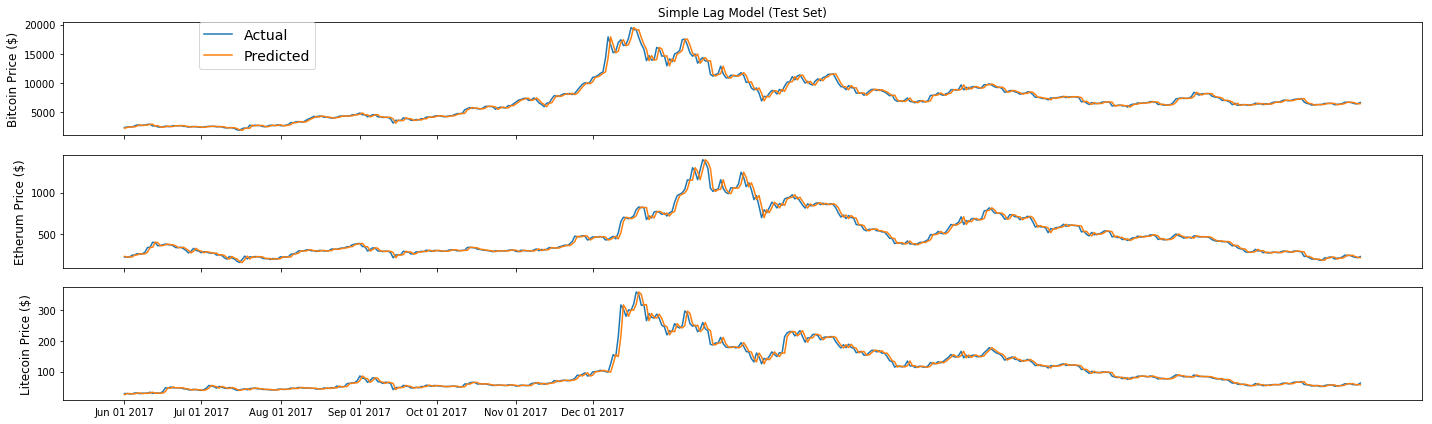

In [22]:
# trivial lag model: P_t = P_(t-1)
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')

ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels('')

ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close**'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax3.set_ylabel('Litecoin Price ($)',fontsize=12)

ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close**'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close**'][1:].values, label='Predicted')

ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['ltc_Close**'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['ltc_Close**'][1:].values, label='Predicted')
fig.tight_layout()
plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

Extending this trivial lag model, [stock prices are commonly treated as random walks](https://www.tcd.ie/Economics/assets/pdf/SER/2007/Samuel_Dupernex.pdf), which can be defined in these mathematical terms:

\begin{align}
PredPrice_{t} & = ActualPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)
\end{align}

We'll determine &mu; and &sigma; from the training sets and apply the random walk model to the Bitcoin and Ethereum test sets.

First, we may want to make sure the daily change in price follows a normal distribution. We'll plot the histogram of values.

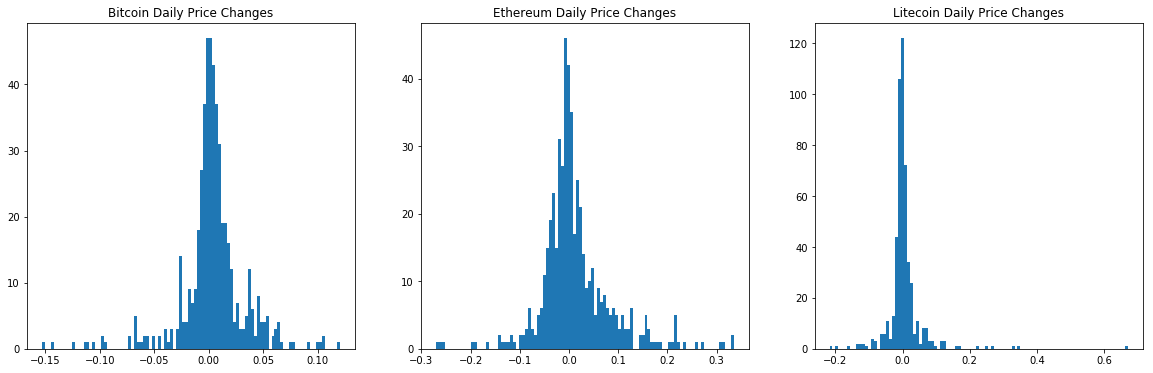

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax3.hist(market_info[market_info['Date']< split_date]['ltc_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
ax3.set_title('Litecoin Daily Price Changes')
plt.show()

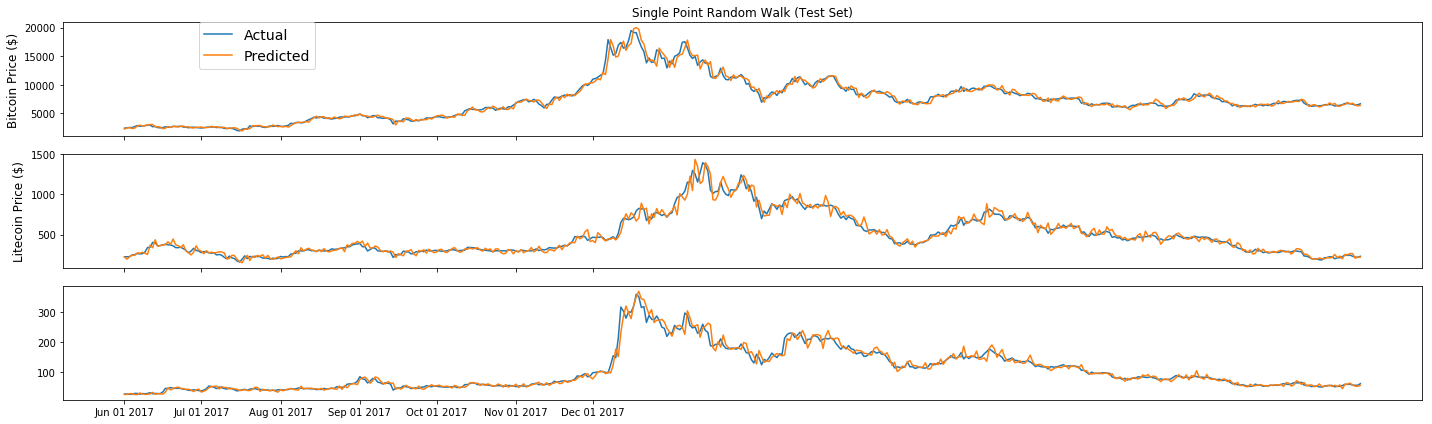

In [24]:
np.random.seed(202)

bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

ltc_r_walk_mean, ltc_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['ltc_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['ltc_day_diff'].values)
ltc_random_steps = np.random.normal(ltc_r_walk_mean, ltc_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')

ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels('')

ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close**'].values[1:] * 
     (1+bt_random_steps), label='Predicted')

ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close**'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close**'].values[1:] * 
     (1+eth_random_steps), label='Predicted')

ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['ltc_Close**'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['ltc_Close**'].values[1:] * 
     (1+ltc_random_steps), label='Predicted')

ax1.set_title('Single Point Random Walk (Test Set)')

ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax2.set_ylabel('Litecoin Price ($)',fontsize=12)

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

plt.tight_layout()
plt.show()

Wow! Look at those prediction lines. Apart from a few kinks, it broadly tracks the actual closing price for each coin. It even captures the eth rises (and subsequent falls) in mid-June and late August. At this stage, if I was to announce the launch of sheehanCoin, I'm sure that ICO would stupidly over-subscribed. As pointed out on that other blog, models that only make predictions one point into the future are often misleadingly accurate, as errors aren't carried over to subsequent predictions. No matter how large the error, it's essentially reset at each time point, as the model is fed the true price. The Bitcoin random walk is particularly deceptive, as the scale of the y-axis is quite wide, making the prediction line appear quite smooth.

Single point predictions are unfortunately quite common when evaluating time series models (e.g.[here](https://medium.com/@binsumi/neural-networks-and-bitcoin-d452bfd7757e) and [here](https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f)). A better idea could be to measure its accuracy on multi-point predictions. That way, errors from previous predictions aren't reset but rather are compounded by subsequent predictions. Thus, poor models are penalised more heavily. In mathematical terms:

\begin{align}
PredPrice_{t} & = PredPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)\ \&  \ PredPrice_0 = Price_0
\end{align}

Let's get our random walk model to predict the closing prices over the total test set.

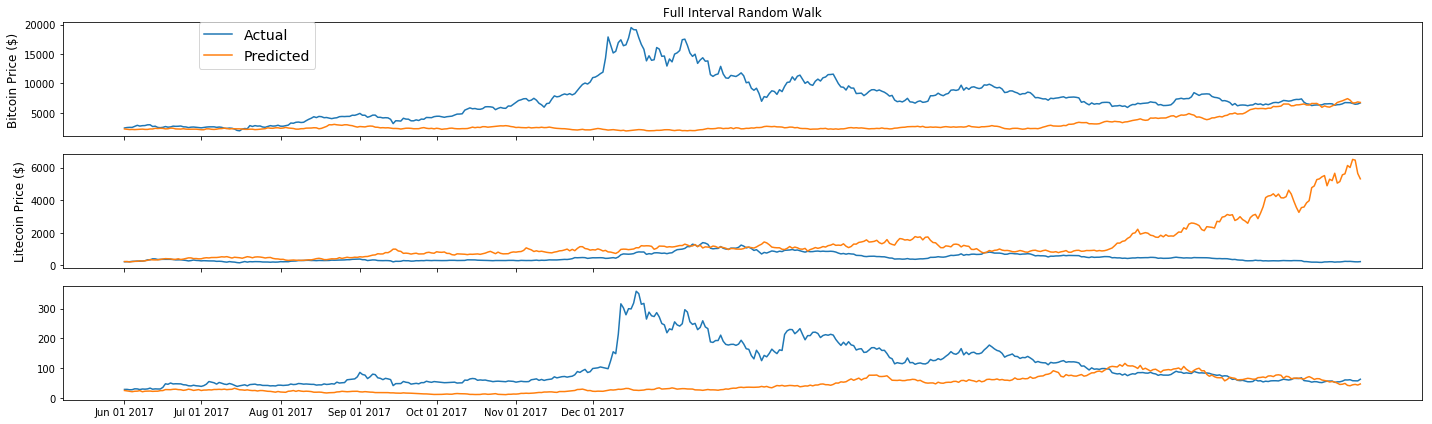

In [25]:
bt_random_walk = []
eth_random_walk = []
ltc_random_walk = []

for n_step, (bt_step, eth_step, ltc_step) in enumerate(zip(bt_random_steps, eth_random_steps, ltc_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close**'].values[0] * (bt_step+1))
        eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close**'].values[0] * (eth_step+1))
        ltc_random_walk.append(market_info[market_info['Date']< split_date]['ltc_Close**'].values[0] * (ltc_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
        ltc_random_walk.append(ltc_random_walk[n_step-1] * (ltc_step+1))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels('')
ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close**'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         eth_random_walk[::-1], label='Predicted')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['ltc_Close**'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         ltc_random_walk[::-1], label='Predicted')

ax1.set_title('Full Interval Random Walk')

ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax2.set_ylabel('Litecoin Price ($)',fontsize=12)

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

plt.tight_layout()
plt.show()

The model predictions are extremely sensitive to the random seed. I've selected one where the full interval random walk looks almost decent for Ethereum. In the [accompanying Jupyter notebook](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb), you can interactively play around with the seed value below to see how badly it can perform.

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)

    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['eth_Close**'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
    
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close**'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close**'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close**'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
             random_walk[::-1])
    
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_clas…

<function __main__.plot_func(freq)>

Notice how the single point random walk always looks quite accurate, even though there's no real substance behind it. Hopefully, you'll be more suspicious of any blog that claims to accurately predict prices. I probably shouldn't worry; it's not like crypto fans to be seduced by [slick marketing claims](https://uetoken.com/).

## Long Short Term Memory (LSTM)

Like I said, if you're interested in the theory behind LSTMs, then I'll refer you to [this](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), [this](http://blog.echen.me/2017/05/30/exploring-lstms/) and [this](http://www.bioinf.jku.at/publications/older/2604.pdf). Luckily, we don't need to build the network from scratch (or even understand it), there exists packages that include standard implementations of various deep learning algorithms (e.g. [TensorFlow](https://www.tensorflow.org/get_started/get_started), [Keras](https://keras.io/#keras-the-python-deep-learning-library), [PyTorch](http://pytorch.org/), etc.). I'll opt for Keras, as I find it the most intuitive for non-experts. If you're not familiar with Keras, then check out my [previous tutorial](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/).

In [27]:
for coins in ['bt_', 'eth_', 'ltc_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close**'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open*'])}
    market_info = market_info.assign(**kwargs)

In [29]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_', 'ltc_'] 
                                   for metric in ['Close**','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close**,bt_Volume,bt_close_off_high,bt_volatility,eth_Close**,eth_Volume,eth_close_off_high,eth_volatility,ltc_Close**,ltc_Volume,ltc_close_off_high,ltc_volatility
1000,2016-01-01,434.33,36278900,-0.560137,0.020268,0.948024,206062,-0.418477,0.025040,3.51,2791170,-0.333333,0.017241
999,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913,3.50,3020260,0.500000,0.011364
998,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792,3.48,2406150,0.000000,0.017143
997,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943,3.50,3309740,-0.333333,0.008621
996,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236,3.47,2104650,0.333333,0.017192


I've created a new data frame called `model_data`. I've removed some of the previous columns (open price, daily highs and lows) and reformulated some new ones. `close_off_high` represents the gap between the closing price and price high for that day, where values of -1 and 1 mean the closing price was equal to the daily low or daily high, respectively. The `volatility` columns are simply the difference between high and low price divided by the opening price. You may also notice that `model_data` is arranged in order of earliest to latest. We don't actually need the date column anymore, as that information won't be fed into the model.

Our LSTM model will use previous data (both bitcoin and eth) to predict the next day's closing price of a specific coin. We must decide how many previous days it will have access to. Again, it's rather arbitrary, but I'll opt for 10 days, as it's a nice round number. We build little data frames consisting of 10 consecutive days of data (called windows), so the first window will consist of the 0-9th rows of the training set (Python is zero-indexed), the second will be the rows 1-10, etc.  Picking a small window size means we can feed more windows into our model; the downside is that the model may not have sufficient information to detect complex long term behaviours (if such things exist). 

Deep learning models don't like inputs that vary wildly. Looking at those columns, some values range between -1 and 1, while others are on the scale of millions. We need to normalise the data, so that our inputs are somewhat consistent. Typically, you want values between -1 and 1. The `off_high` and `volatility` columns are fine as they are. For the remaining columns, like that [other blog post](http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price), we'll normalise the inputs to the first value in the window.

In [30]:
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [31]:
window_len = 30
norm_cols = [coin+metric for coin in ['bt_', 'eth_', 'ltc_'] for metric in ['Close**','Volume']]

In [32]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close**'][window_len:].values/training_set['eth_Close**'][:-window_len].values)-1

In [33]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close**'][window_len:].values/test_set['eth_Close**'][:-window_len].values)-1

In [34]:
LSTM_training_inputs[0]

,bt_Close**,bt_Volume,bt_close_off_high,bt_volatility,eth_Close**,eth_Volume,eth_close_off_high,eth_volatility,ltc_Close**,ltc_Volume,ltc_close_off_high,ltc_volatility
1000,0.000000,0.000000,-0.560137,0.020268,0.000000,0.000000,-4.184773e-01,0.025040,0.000000,0.000000,-0.333333,0.017241
999,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,9.658978e-01,0.034913,-0.002849,0.082077,0.500000,0.011364
998,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-3.178846e-01,0.060792,-0.008547,-0.137942,0.000000,0.017143
997,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-5.765723e-02,0.047943,-0.002849,0.185789,-0.333333,0.008621
996,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,6.979297e-01,0.025236,-0.011396,-0.245961,0.333333,0.017192
995,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-2.145405e-01,0.026263,-0.017094,-0.208626,0.333333,0.008646
994,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,6.816436e-01,0.040587,0.025641,0.633967,-0.882353,0.049275
993,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-8.067166e-01,0.055274,0.017094,0.174414,0.272727,0.030556
992,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-4.118965e-01,0.019021,0.014245,0.051430,0.200000,0.014006
991,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-9.382354e-01,0.025266,0.008547,-0.117933,-0.333333,0.016854


This table represents an example of our LSTM model input (we'll actually have hundreds of similar tables). We've normalised some columns so that their values are equal to 0 in the first time point, so we're aiming to predict changes in price relative to this timepoint. We're now ready to build the LSTM model. This is actually quite straightforward with Keras, you simply stack componenets on top of each other (better explained [here](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/)).

In [41]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

LSTM_training_inputs

array([[[ 0.00000000e+00,  0.00000000e+00, -5.60137457e-01, ...,
          0.00000000e+00, -3.33333333e-01,  1.72413793e-02],
        [-2.04913315e-03, -1.70410349e-01,  2.50596659e-01, ...,
          8.20766919e-02,  5.00000000e-01,  1.13636364e-02],
        [-9.94635415e-03,  9.24752404e-02, -1.73864895e-01, ...,
         -1.37942153e-01,  0.00000000e+00,  1.71428571e-02],
        ...,
        [-1.24421523e-01,  6.33122834e-01,  9.28979074e-01, ...,
          1.01824683e-01,  8.94736842e-01,  5.77507599e-02],
        [-1.26309488e-01,  1.37397760e+00, -4.81246698e-01, ...,
         -8.42979826e-02, -2.50000000e-01,  2.54777070e-02],
        [-1.29095388e-01, -1.65233786e-01,  2.00902935e-01, ...,
         -5.34610934e-01,  1.00000000e+00,  1.28205128e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.50596659e-01, ...,
          0.00000000e+00,  5.00000000e-01,  1.13636364e-02],
        [-7.91343669e-03,  3.16886293e-01, -1.73864895e-01, ...,
         -2.03330177e-01,  0.00000000e

In [36]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


So, the `build_model` functions constructs an empty model unimaginatively called model (`model = Sequential`), to which an LSTM layer is added. That layer has been shaped to fit our inputs (n x m tables, where n and m represent the number of timepoints/rows and columns, respectively). The function also includes more generic neural network features, like [dropout](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) and [activation functions](https://dashee87.github.io/data%20science/deep%20learning/visualising-activation-functions-in-neural-networks/). Now, we just need to specify the number of neurons to place in the LSTM layer (I've opted for 20 to keep runtime reasonable), as well as the data on which the model will be trained.

In [48]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close**'][window_len:].values/training_set['eth_Close**'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 6s - loss: 0.4216
Epoch 2/50
 - 6s - loss: 0.2369
Epoch 3/50
 - 5s - loss: 0.2172
Epoch 4/50
 - 5s - loss: 0.1749
Epoch 5/50
 - 5s - loss: 0.1800
Epoch 6/50
 - 5s - loss: 0.1722
Epoch 7/50
 - 4s - loss: 0.1542
Epoch 8/50
 - 4s - loss: 0.1490
Epoch 9/50
 - 4s - loss: 0.1582
Epoch 10/50
 - 4s - loss: 0.1378
Epoch 11/50
 - 5s - loss: 0.1436
Epoch 12/50
 - 6s - loss: 0.1352
Epoch 13/50
 - 7s - loss: 0.1345
Epoch 14/50
 - 5s - loss: 0.1361
Epoch 15/50
 - 5s - loss: 0.1388
Epoch 16/50
 - 5s - loss: 0.1325
Epoch 17/50
 - 5s - loss: 0.1429
Epoch 18/50
 - 6s - loss: 0.1396
Epoch 19/50
 - 5s - loss: 0.1202
Epoch 20/50
 - 5s - loss: 0.1293
Epoch 21/50
 - 4s - loss: 0.1309
Epoch 22/50
 - 5s - loss: 0.1309
Epoch 23/50
 - 5s - loss: 0.1311
Epoch 24/50
 - 5s - loss: 0.1265
Epoch 25/50
 - 5s - loss: 0.1222
Epoch 26/50
 - 5s - loss: 0.1255
Epoch 27/50
 - 5s - loss: 0.1275
Epoch 28/50
 - 6s - loss: 0.1193
Epoch 29/50
 - 6s - loss: 0.1121
Epoch 30/50
 - 5s - loss: 0.1182
Epoch 31/50
 - 5s -

If everything went to plan, then we'd expect the training error to have gradually decreased over time.

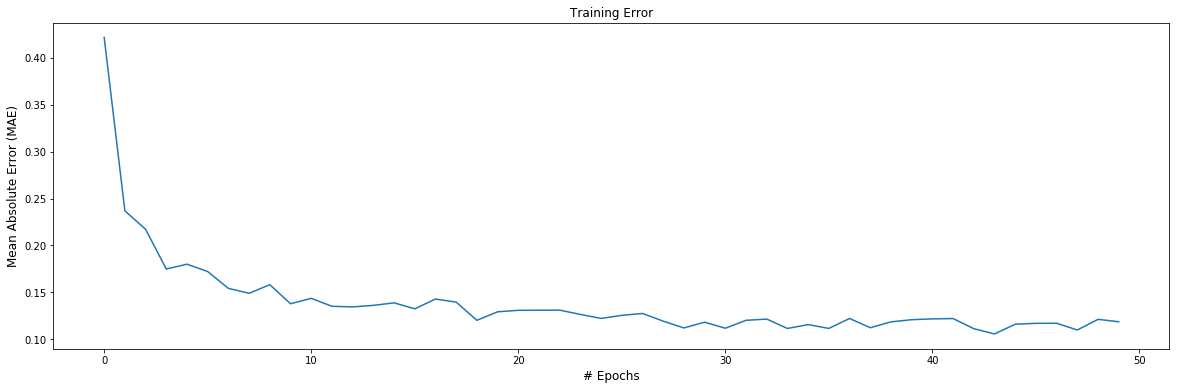

In [51]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

We've just built an LSTM model to predict tomorrow's Ethereum closing price. Let's see how well it performs. We start by examining its performance on the training set (data before June 2017). That number below the code represents the model's mean absolute error (mae) on the training set after the 50th training iteration (or epoch). Instead of relative changes, we can view the model output as daily closing prices.

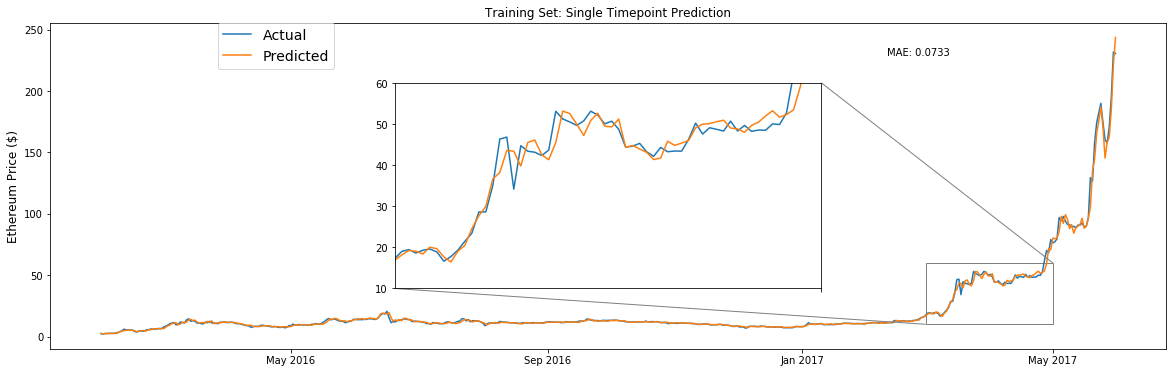

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close**'].values[window_len:])/(training_set['eth_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close**'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close**'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

We shouldn't be too surprised by its apparent accuracy here. The model could access the source of its error and adjust itself accordingly. In fact, it's not hard to attain almost zero training errors. We could just cram in hundreds of neurons and train for thousands of epochs (a process known as overfitting, where you're essentially predicting noise- I included the `Dropout()` call in the `build_model` function to mitigate this risk for our relatively small model). We should be more interested in its performance on the test dataset, as this represents completely new data for the model.

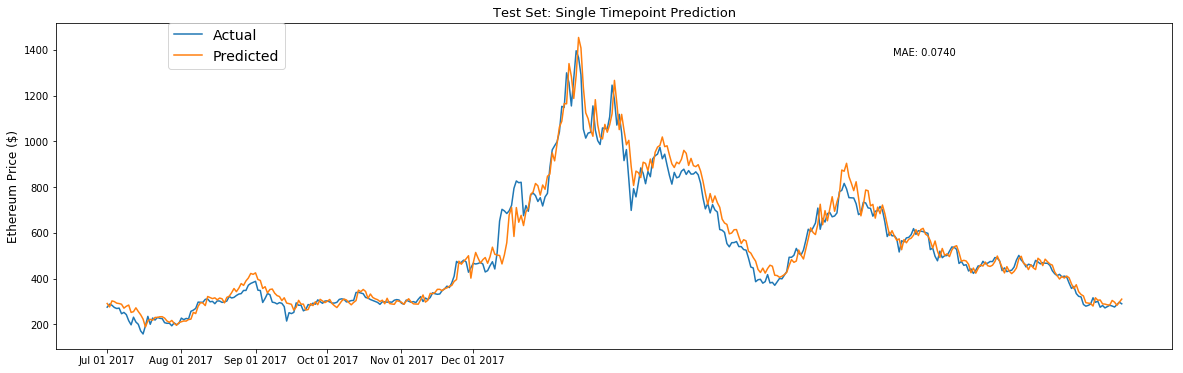

In [36]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close**'].values[window_len:])/(test_set['eth_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

Caveats aside about the misleading nature of single point predictions, our LSTM model *seems* to have performed well on the unseen test set. The most obvious flaw is that it fails to detect the inevitable downturn when the eth price suddenly shoots up (e.g mid-June and October). In fact, this is a persistent failure; it's just more apparent at these spikes. The predicted price regularly seems equivalent to the actual price just shifted one day later (e.g. the drop in mid-July). Furthermore, the model seems to be systemically overestimating the future value of Ether (join the club, right?), as the predicted line near always runs higher than the actual line. I suspect this is because the training data represents a period during which the price of Ether rose astronomically, so it expects that trend to continue (don't we all). We can also build a similar LSTM model for Bitcoin- test set predictions are plotted below (see [Jupyter notebook for full code](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb)).

In [39]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close**'][window_len:].values/training_set['bt_Close**'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)


Epoch 1/50
 - 8s - loss: 0.1773
Epoch 2/50
 - 6s - loss: 0.1123
Epoch 3/50
 - 6s - loss: 0.0948
Epoch 4/50
 - 7s - loss: 0.0729
Epoch 5/50
 - 7s - loss: 0.0635
Epoch 6/50
 - 6s - loss: 0.0609
Epoch 7/50
 - 6s - loss: 0.0565
Epoch 8/50
 - 5s - loss: 0.0526
Epoch 9/50
 - 5s - loss: 0.0503
Epoch 10/50
 - 7s - loss: 0.0499
Epoch 11/50
 - 6s - loss: 0.0477
Epoch 12/50
 - 5s - loss: 0.0424
Epoch 13/50
 - 5s - loss: 0.0408
Epoch 14/50
 - 5s - loss: 0.0405
Epoch 15/50
 - 5s - loss: 0.0407
Epoch 16/50
 - 5s - loss: 0.0410
Epoch 17/50
 - 5s - loss: 0.0387
Epoch 18/50
 - 5s - loss: 0.0390
Epoch 19/50
 - 5s - loss: 0.0387
Epoch 20/50
 - 5s - loss: 0.0395
Epoch 21/50
 - 5s - loss: 0.0354
Epoch 22/50
 - 5s - loss: 0.0380
Epoch 23/50
 - 5s - loss: 0.0378
Epoch 24/50
 - 5s - loss: 0.0365
Epoch 25/50
 - 5s - loss: 0.0372
Epoch 26/50
 - 6s - loss: 0.0378
Epoch 27/50
 - 5s - loss: 0.0376
Epoch 28/50
 - 5s - loss: 0.0344
Epoch 29/50
 - 5s - loss: 0.0346
Epoch 30/50
 - 6s - loss: 0.0344
Epoch 31/50
 - 9s -

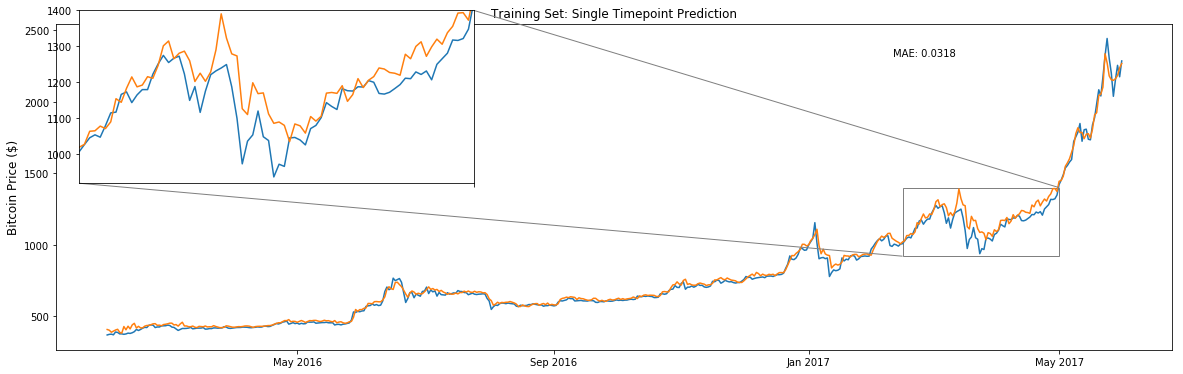

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close**'].values[window_len:])/(training_set['bt_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close**'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close**'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
axins.set_ylim([920, 1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

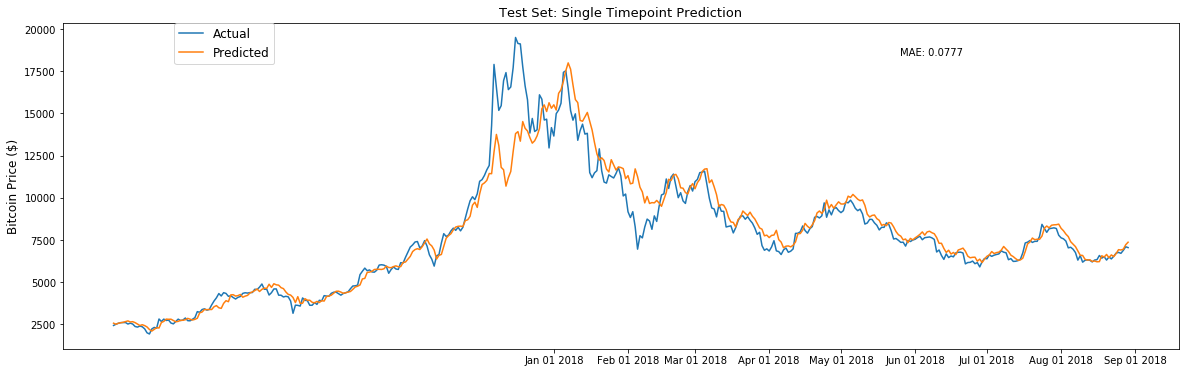

In [41]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         test_set['bt_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close**'].values[window_len:])/(test_set['bt_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 12})
plt.show()

In [42]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
ltc_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
ltc_history = ltc_model.fit(LSTM_training_inputs, 
                           (training_set['ltc_Close**'][window_len:].values/training_set['ltc_Close**'][:-window_len].values)-1, 
                           epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 5s - loss: 0.2777
Epoch 2/50
 - 5s - loss: 0.1717
Epoch 3/50
 - 5s - loss: 0.1386
Epoch 4/50
 - 4s - loss: 0.1167
Epoch 5/50
 - 5s - loss: 0.1064
Epoch 6/50
 - 5s - loss: 0.1064
Epoch 7/50
 - 4s - loss: 0.0964
Epoch 8/50
 - 5s - loss: 0.0892
Epoch 9/50
 - 5s - loss: 0.0892
Epoch 10/50
 - 5s - loss: 0.0897
Epoch 11/50
 - 5s - loss: 0.0813
Epoch 12/50
 - 5s - loss: 0.0732
Epoch 13/50
 - 4s - loss: 0.0755
Epoch 14/50
 - 4s - loss: 0.0688
Epoch 15/50
 - 4s - loss: 0.0782
Epoch 16/50
 - 4s - loss: 0.0820
Epoch 17/50
 - 5s - loss: 0.0694
Epoch 18/50
 - 5s - loss: 0.0753
Epoch 19/50
 - 6s - loss: 0.0719
Epoch 20/50
 - 7s - loss: 0.0735
Epoch 21/50
 - 6s - loss: 0.0697
Epoch 22/50
 - 5s - loss: 0.0640
Epoch 23/50
 - 5s - loss: 0.0695
Epoch 24/50
 - 5s - loss: 0.0660
Epoch 25/50
 - 5s - loss: 0.0616
Epoch 26/50
 - 6s - loss: 0.0654
Epoch 27/50
 - 6s - loss: 0.0669
Epoch 28/50
 - 5s - loss: 0.0641
Epoch 29/50
 - 5s - loss: 0.0668
Epoch 30/50
 - 5s - loss: 0.0624
Epoch 31/50
 - 5s -

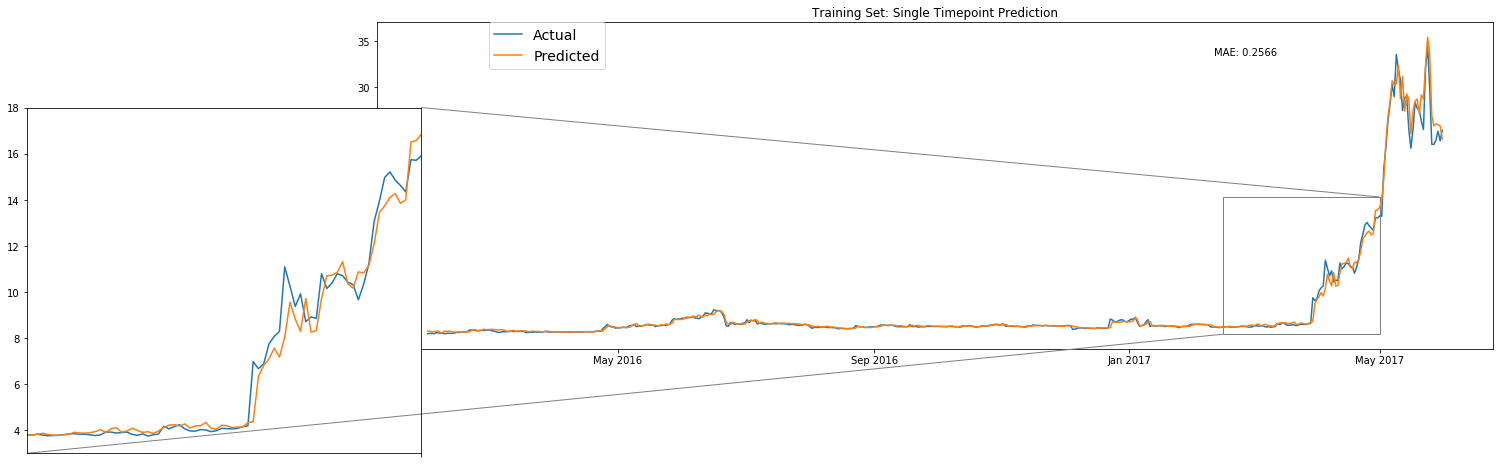

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)

ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])

ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['ltc_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(ltc_model.predict(LSTM_training_inputs))+1) * training_set['ltc_Close**'].values[:-window_len])[0], 
         label='Predicted')

ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Litecoin Price ($)',fontsize=12)

ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['ltc_Close**'].values[window_len:])/(training_set['ltc_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=2, bbox_to_anchor=(-175, 300)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])

axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['ltc_Close**'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(ltc_model.predict(LSTM_training_inputs))+1) * training_set['ltc_Close**'].values[:-window_len])[0], 
         label='Predicted')

axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
axins.set_ylim([3, 18])
axins.set_xticklabels('')

mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()

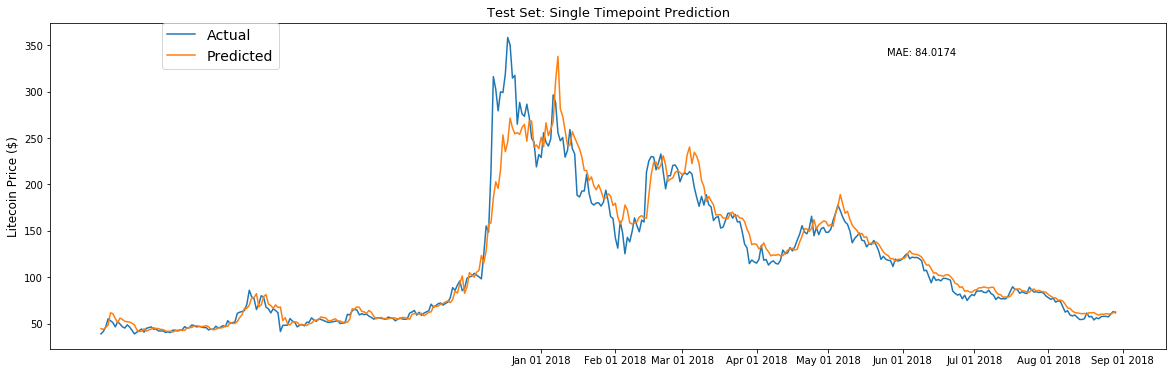

In [45]:
fig, ax1 = plt.subplots(1,1)

ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         test_set['ltc_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         ((np.transpose(ltc_model.predict(LSTM_test_inputs))+1) * test_set['ltc_Close**'].values[:-window_len])[0], 
         label='Predicted')

ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(ltc_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close**'].values[window_len:])/(test_set['ltc_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
             xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Litecoin Price ($)',fontsize=12)

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

plt.show()

As I've stated earlier, single point predictions can be deceptive. Looking more closely, you'll notice that, again, the predicted values regularly mirror the previous values (e.g. October). Our fancy deep learning LSTM model has partially reproducted a [autregressive (AR) model](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/) of some order `p`, where future values are simply the weighted sum of the previous `p` values. We can define an AR model in these mathematical terms:  

\begin{align}
PredPrice_{t} & = \phi_0 + \phi_1*Price_{t-1} + \ldots + \phi_p*Price_{t-p} + \epsilon_t, \ \epsilon_t \sim N(0, \sigma)\
\end{align}

The good news is that AR models are commonly employed in time series tasks (e.g. [stock market prices](https://upcommons.upc.edu/bitstream/handle/2099/3572/04marcek.pdf)), so the LSTM model appears to have landed on a sensible solution. The bad news is that it's a waste of the LSTM capabilities, we could have a built a much simpler AR model in much less time and probably achieved similar results (though the title of this post would have been much less clickbaity). [More complex does not automatically equal more accurate](https://pdfs.semanticscholar.org/696c/2fa5697f58914921ff37d69ced44ddea143f.pdf)). 

We'll now build LSTM models to predict crypto prices for the next 5 days.

In [46]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 30
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['eth_Close**'])-pred_range):
    LSTM_training_outputs.append((training_set['eth_Close**'][i:i+pred_range].values/
                                  training_set['eth_Close**'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=100, batch_size=1, verbose=2, shuffle=True)

Epoch 1/100
 - 7s - loss: 0.7705
Epoch 2/100
 - 5s - loss: 0.4855
Epoch 3/100
 - 4s - loss: 0.4207
Epoch 4/100
 - 4s - loss: 0.3994
Epoch 5/100
 - 4s - loss: 0.3681
Epoch 6/100
 - 4s - loss: 0.3721
Epoch 7/100
 - 4s - loss: 0.3391
Epoch 8/100
 - 5s - loss: 0.3162
Epoch 9/100
 - 4s - loss: 0.3190
Epoch 10/100
 - 5s - loss: 0.2933
Epoch 11/100
 - 4s - loss: 0.2865
Epoch 12/100
 - 4s - loss: 0.3061
Epoch 13/100
 - 4s - loss: 0.2706
Epoch 14/100
 - 5s - loss: 0.2812
Epoch 15/100
 - 4s - loss: 0.2623
Epoch 16/100
 - 4s - loss: 0.2587
Epoch 17/100
 - 4s - loss: 0.2654
Epoch 18/100
 - 5s - loss: 0.2660
Epoch 19/100
 - 5s - loss: 0.2570
Epoch 20/100
 - 4s - loss: 0.2620
Epoch 21/100
 - 4s - loss: 0.2542
Epoch 22/100
 - 4s - loss: 0.2493
Epoch 23/100
 - 4s - loss: 0.2503
Epoch 24/100
 - 4s - loss: 0.2464
Epoch 25/100
 - 4s - loss: 0.2398
Epoch 26/100
 - 4s - loss: 0.2447
Epoch 27/100
 - 4s - loss: 0.2420
Epoch 28/100
 - 4s - loss: 0.2335
Epoch 29/100
 - 4s - loss: 0.2423
Epoch 30/100
 - 4s - lo

In [47]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 30
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close**'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close**'][i:i+pred_range].values/
                                  training_set['bt_Close**'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 6s - loss: 0.1625
Epoch 2/50
 - 5s - loss: 0.1136
Epoch 3/50
 - 4s - loss: 0.0959
Epoch 4/50
 - 5s - loss: 0.0878
Epoch 5/50
 - 6s - loss: 0.0817
Epoch 6/50
 - 6s - loss: 0.0781
Epoch 7/50
 - 5s - loss: 0.0760
Epoch 8/50
 - 5s - loss: 0.0727
Epoch 9/50
 - 5s - loss: 0.0722
Epoch 10/50
 - 5s - loss: 0.0688
Epoch 11/50
 - 4s - loss: 0.0675
Epoch 12/50
 - 4s - loss: 0.0686
Epoch 13/50
 - 4s - loss: 0.0650
Epoch 14/50
 - 4s - loss: 0.0642
Epoch 15/50
 - 4s - loss: 0.0621
Epoch 16/50
 - 4s - loss: 0.0607
Epoch 17/50
 - 4s - loss: 0.0604
Epoch 18/50
 - 4s - loss: 0.0592
Epoch 19/50
 - 4s - loss: 0.0578
Epoch 20/50
 - 4s - loss: 0.0583
Epoch 21/50
 - 4s - loss: 0.0569
Epoch 22/50
 - 4s - loss: 0.0557
Epoch 23/50
 - 4s - loss: 0.0568
Epoch 24/50
 - 4s - loss: 0.0568
Epoch 25/50
 - 4s - loss: 0.0537
Epoch 26/50
 - 4s - loss: 0.0535
Epoch 27/50
 - 4s - loss: 0.0519
Epoch 28/50
 - 4s - loss: 0.0537
Epoch 29/50
 - 4s - loss: 0.0527
Epoch 30/50
 - 5s - loss: 0.0515
Epoch 31/50
 - 5s -

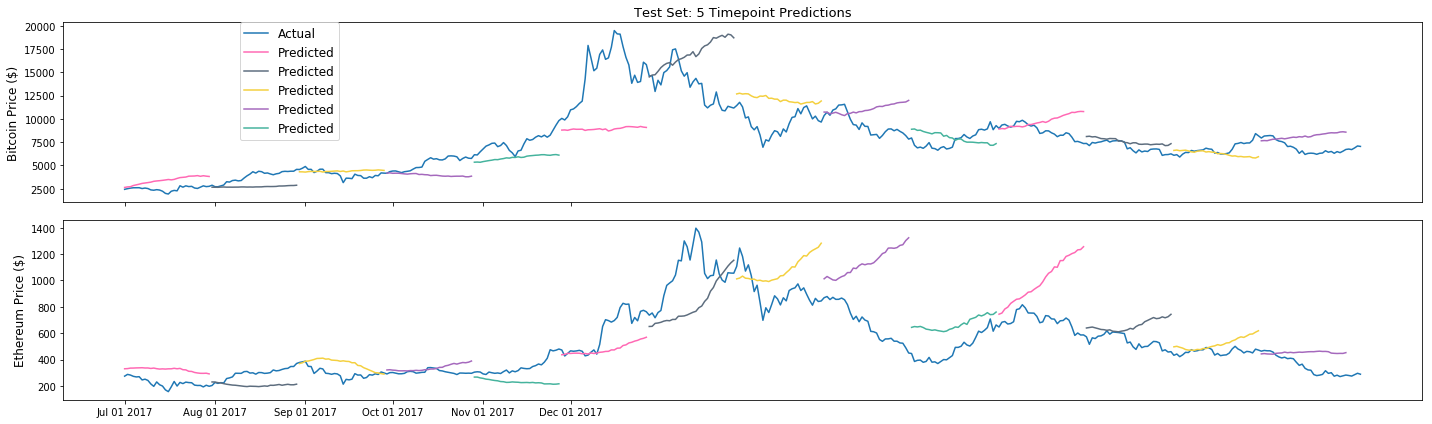

In [48]:
# little bit of reformatting the predictions to closing prices
eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['eth_Close**'].values[:-(window_len + pred_range)][::30].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close**'].values[:-(window_len + pred_range)][::30].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]

fig, (ax1, ax2) = plt.subplots(2,1)

ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['bt_Close**'][window_len:], label='Actual')
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close**'][window_len:], label='Actual')

for i, (eth_pred, bt_pred) in enumerate(zip(eth_pred_prices, bt_pred_prices)):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
    ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
             eth_pred, color=pred_colors[i%5])

    ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)

ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels('')
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()

plt.show()

The predictions are visibly less impressive than their single point counterparts. Nevertheless, I'm pleased that the model returned somewhat nuanced behaviours (e.g. the second line on the eth graph); it didn't simply forecast prices to move uniformly in one direction. So there are some grounds for optimism.

Moving back to the single point predictions, our deep machine artificial neural model looks okay, but so did that boring random walk model. Like the random walk model, LSTM models can be sensitive to the choice of random seed (the model weights are initially randomly assigned). So, if we want to compare the two models, we'll run each one multiple (say, 25) times to get an estimate for the model error. The error will be calculated as the absolute difference between the actual and predicted closing prices changes in the test set.

In [49]:
# warning: this cell may take some time to execute
# this code builds 25 LSTM models for eth and bitcoin each (with 25 different initialisations)
# the models are then saved so you hopefully only need to run this cell once

# random seed for reproducibility
for rand_seed in range(775,800):
    print(rand_seed)
    np.random.seed(rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['eth_Close**'][window_len:].values/training_set['eth_Close**'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['bt_Close**'][window_len:].values/training_set['bt_Close**'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('bt_model_randseed_%d.h5'%rand_seed)

775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799


In [50]:
# assuming the previous cell was completed, this cell loads in the different initialisations
# and calculates the average mean absolute error (mae)

from keras.models import load_model

eth_preds = []
bt_preds = []
for rand_seed in range(775,800):
    temp_model = load_model('eth_model_randseed_%d.h5'%rand_seed)
    eth_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['eth_Close**'].values[window_len:]/test_set['eth_Close**'].values[:-window_len]-1))))
    temp_model = load_model('bt_model_randseed_%d.h5'%rand_seed)
    bt_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['bt_Close**'].values[window_len:]/test_set['bt_Close**'].values[:-window_len]-1))))

In [51]:
eth_random_walk_preds = []
bt_random_walk_preds = []
for rand_seed in range(775,800):
    np.random.seed(rand_seed)
    eth_random_walk_preds.append(
        np.mean(np.abs((np.random.normal(eth_r_walk_mean, eth_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['eth_Close**'][window_len:])/np.array(test_set['eth_Close**'][:-window_len]))))
    bt_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(bt_r_walk_mean, bt_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['bt_Close**'][window_len:])/np.array(test_set['bt_Close**'][:-window_len]))))

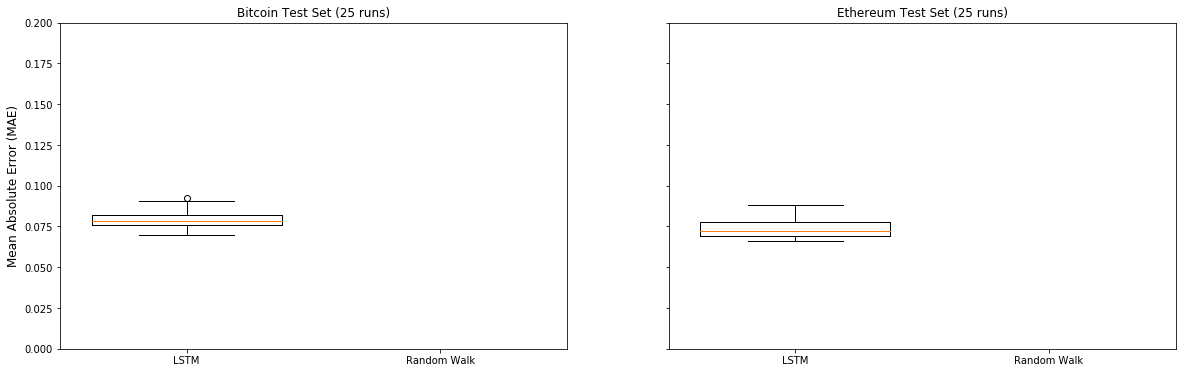

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([bt_preds, bt_random_walk_preds],widths=0.75)
ax1.set_ylim([0, 0.2])
ax2.boxplot([eth_preds, eth_random_walk_preds],widths=0.75)
ax2.set_ylim([0, 0.2])
ax1.set_xticklabels(['LSTM', 'Random Walk'])
ax2.set_xticklabels(['LSTM', 'Random Walk'])
ax1.set_title('Bitcoin Test Set (25 runs)')
ax2.set_title('Ethereum Test Set (25 runs)')
ax2.set_yticklabels('')
ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.show()

Maybe AI is worth the hype after all! Those graphs show the error on the test set after 25 different initialisations of each model. The LSTM model returns an average error of about 0.04 and 0.05 on the bitcoin and eth prices, respectively, crushing the corresponding random walk models.

Aiming to beat random walks is a pretty low bar. It would be more interesting to compare the LSTM model against more appropriate time series models (weighted average, autoregression, [ARIMA](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/) or Facebook's [Prophet algorithm](https://github.com/facebook/prophet)). On the other hand, I'm sure it wouldn't be hard to improve our LSTM model (gratuitously adding more layers and/or neurons, changing the batch size, learning rate, etc.). That said, hopefully you've detected my scepticism when it comes to applying deep learning to predict changes in crypto prices. That's because we're overlooking the best framework of all: human intelligence. Clearly, the perfect model* for predicting cryptos is:

\begin{align}
& Price^{Crypto}_{t} > Price^{Crypto}_{t-1} \,  \forall \ Crypto \neq OmiseGo \textrm{, }  \\
& \textrm{  where } Price^{Crypto}_{t} \to moon \textrm{, as } t \to    \infty           
\end{align}

&#42; This blog does not constitute financial advice and should not be taken as such. While cryptocurrency investments will definitely go up in value forever, they may also go down.

## Summary

We've collected some crypto data and fed it into a supercool deeply intelligent machine learning LSTM model. Unfortunately, its predictions were not that different from just spitting out the previous value. How can we make the model learn more sophisticated behaviours?

* **Change Loss Function**: MAE doesn't really encourage risk taking. For example, under mean squared error (MSE), the LSTM model would be forced to place more importance on detecting spikes/troughs. [More bespoke trading focused loss functions](http://www.faculty.ucr.edu/~taelee/paper/lossfunctions.pdf) could also move the model towards less conservative behaviours.

* **Penalise conservative AR-type models**: This would incentivise the deep learning algorithm to explore more risky/interesting models. Easier said than done!

* **Get more and/or better data**: If past prices alone are sufficient to decently forecast future prices, we need to include other features that provide comparable predictive power. That way, the LSTM model wouldn't be so reliant on past prices, potentially unlocking more complex behaviours. This is probably the best and hardest solution.

If that's the positive spin, then the negative reality is that it's entirely possible that there is no detectable pattern to changes in crypto prices; that no model (however deep) can separate the signal from the noise (similar to the merits of using [deep learning to predict earthquakes](https://www.scientificamerican.com/article/can-artificial-intelligence-predict-earthquakes/)). And any pattern that does appear [can disappear as quickly](http://site.iugaza.edu.ps/wdaya/files/2013/03/A-Random-Walk-Down-Wall-Street.pdf) (see [efficient market hypothesis](results_merge.click2)). Just think how different Bitcoin in 2016 is to craze-riding Bitcoin of late 2017. Any model built on 2016 data would surely struggle to replicate these unprecedented movements. All of this suggests you might as well save yourself some time and stick to autoregression (unless you're writing a blog, of course).

But I'm sure they'll eventually find some use cases for deep learning. In the meantime, you can build your own LSTM model by downloading the Python code [here](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb). Thanks for reading!